In [72]:
import numpy as np

> **Puzzle 3:** Obtain the array `[4., 4., 4.]` from `extended_array` by using slicing and `log`.

In [7]:
#Hidden answer Puzzle 3:
#np.log(extended_array[3::4])

> **Puzzle 4:** Change all the last two columns by zeros using slicing, np.shape and np.zeros (assuming you don't know the size of the array beforehand)

In [6]:
#Hidden answer Puzzle 4:
#array2d[:,-2:]=np.zeros((array2d.shape[0],2))
#print(array2d)

> **Exercise 1:** Using broadcasting and in max. 2 lines of code, construct a multiplication table of the numbers from 1 to 10, i.e., where for each column corresponding to 1,2,3,..., the rows correspond to their integer multiples. For 1 to 3, it looks like this:

---

|1|2|3|
|--|--|--|
|2|4|6|
|3|6|9|

> Then, using masking, remove all multiples of 3, in one line of code. So that the result (in this case for 3x3) looks like this:

|1|2|0|
|--|--|--|
|2|4|0|
|0|0|0|

> Finally, compute the sum over each column and write it into a list:

                                                      [3,6,0]


In [73]:
x1 = np.arange(1,11)
mult = x1[:,np.newaxis] * x1[None,:]
print(mult)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


In [74]:
mult[(mult %3 == 0)] = 0
mult

array([[  1,   2,   0,   4,   5,   0,   7,   8,   0,  10],
       [  2,   4,   0,   8,  10,   0,  14,  16,   0,  20],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  4,   8,   0,  16,  20,   0,  28,  32,   0,  40],
       [  5,  10,   0,  20,  25,   0,  35,  40,   0,  50],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  7,  14,   0,  28,  35,   0,  49,  56,   0,  70],
       [  8,  16,   0,  32,  40,   0,  56,  64,   0,  80],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 10,  20,   0,  40,  50,   0,  70,  80,   0, 100]])

In [78]:
#With list comprehensions
[np.sum(mult[:,ii]) for ii in range(mult.shape[1])]

[37, 74, 0, 148, 185, 0, 259, 296, 0, 370]

In [80]:
#With numpy functions
np.apply_along_axis(np.sum,1, mult)

array([ 37,  74,   0, 148, 185,   0, 259, 296,   0, 370])

### **Exercise 2:** 
  * Produce a random set of points, following a normal distribution with mean 0 and covariance matrix `cov=[[1, 3.0/5], [3/5.0, 2]]`.
  * Plot the set of points using `plt.scatter(X, Y)`
  * Comment: Write equation in LaTeX $$\exp(x^2)$$
  * Compute the marginal distributions for the x and y coordinates and using numpy functions, check that they follow a Gaussian distribution when compared to their histograms. (Hints: `plt.hist(points, bins, density=True)`, `np.exp`, `np.sqrt`, `np.std`, `np.mean`). Use 25 bins.
  * Using masking and `np.where` remove all points whose y-coordinate is more than 2-sigma away from the mean.
  * Plot the remaining points in a scatter plot with blue color, with `facecolor='none'` and size `s=200`,  together with the old set of points in red color with a transparency of alpha=0.6.

In [23]:
mean = [0, 0]
cov = [[1, 3.0/5],
       [3/5.0, 2]]
X = np.random.multivariate_normal(mean, cov, 1000)
X.shape

(1000, 2)

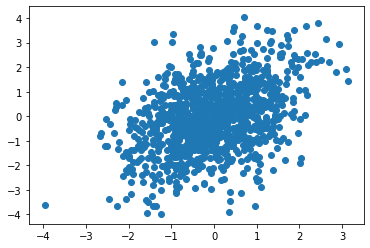

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

In [40]:
xx = np.linspace(-3,3,1000)
yy = np.empty((2,xx.shape[0]))
yy[0] = 1/np.sqrt(2*np.pi*(np.std(X[:,0]))**2) * np.exp(-xx**2 / (2*(np.std(X[:,0]))**2))
yy[1] = 1/np.sqrt(2*np.pi*(np.std(X[:,1]))**2) * np.exp(-xx**2 / (2*(np.std(X[:,1]))**2))

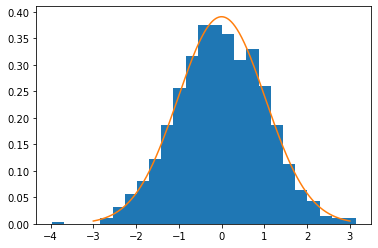

In [41]:
plt.hist(X[:,0], 25, density=True)
plt.plot(xx, yy[0])

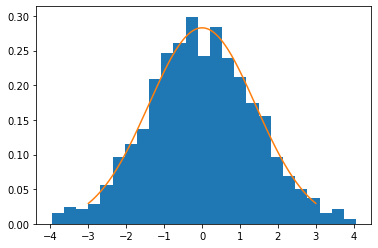

In [42]:
plt.hist(X[:,1], 25, density=True)
plt.plot(xx, yy[1])

In [115]:
exclude=np.where(np.sqrt(X[:,1]**2) > 2*np.std(X[:,1]))

In [116]:
Xnew.shape

(951, 2)

In [117]:
exclude[0].shape

(49,)

In [118]:
X.shape[0]-(exclude[0].shape[0])

951

In [119]:
Xnew = np.empty((X.shape[0]-(exclude[0].shape[0]), 2))

In [120]:
Xnew[:,1] = np.delete(X[:,1], exclude)

In [121]:
Xnew[:,0] = np.delete(X[:,0], exclude)

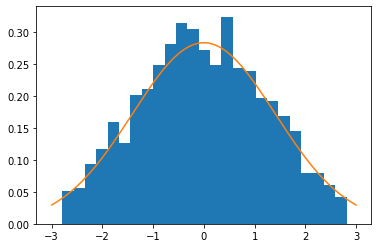

In [122]:
plt.hist(Xnew[:,1], 25, density=True)
plt.plot(xx, yy[1])

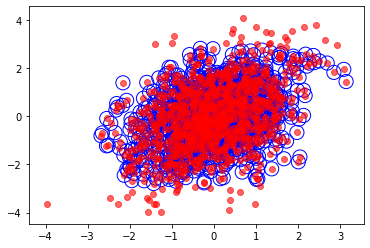

In [71]:
plt.scatter(Xnew[:, 0], Xnew[:, 1], color='blue', facecolor='none', s=200);
plt.scatter(X[:, 0], X[:, 1], color='red', alpha=0.6);

# Pandas

In [123]:
import pandas as pd

In [124]:
cr_temp = pd.read_csv('./materials/CR_Temp.csv')
cr_temp = pd.read_csv('./materials/CR_Temp.csv', index_col=1)
cr_temp.head()

,N,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SET,OCT,NOV,DIC,AVERAGE
YEAR,,,,,,,,,,,,,,
1958,1,20.5,21.5,23.2,23.3,24.4,24.2,23.4,23.3,23.6,23.6,22.7,21.6,22.9
1959,2,20.8,21.1,22.0,22.4,23.0,23.0,22.5,22.5,23.0,22.7,22.0,21.2,22.2
1960,3,21.0,21.2,21.9,22.8,23.8,23.5,22.9,23.2,23.0,23.5,22.2,21.9,22.6
1961,4,21.1,21.6,22.1,22.5,22.5,22.4,22.7,23.1,22.7,22.8,22.4,22.7,22.4
1962,5,20.8,20.7,21.9,22.0,23.0,23.3,22.8,22.8,23.2,23.0,21.9,20.9,22.2


In [125]:
#Remove the 'N' column
cr_temp = cr_temp.drop(columns='N')
cr_temp.head()

,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SET,OCT,NOV,DIC,AVERAGE
YEAR,,,,,,,,,,,,,
1958,20.5,21.5,23.2,23.3,24.4,24.2,23.4,23.3,23.6,23.6,22.7,21.6,22.9
1959,20.8,21.1,22.0,22.4,23.0,23.0,22.5,22.5,23.0,22.7,22.0,21.2,22.2
1960,21.0,21.2,21.9,22.8,23.8,23.5,22.9,23.2,23.0,23.5,22.2,21.9,22.6
1961,21.1,21.6,22.1,22.5,22.5,22.4,22.7,23.1,22.7,22.8,22.4,22.7,22.4
1962,20.8,20.7,21.9,22.0,23.0,23.3,22.8,22.8,23.2,23.0,21.9,20.9,22.2


In [127]:
cr_temp.loc[:, 'ENE':'DIC'] ;

In [129]:
#Compute the mean along the axis 1, on a sliced subset.
my_mean = (cr_temp.loc[:, 'ENE':'DIC']).mean(axis=1)

In [130]:
# Check if the two mean columns agree.
np.mean(my_mean - cr_temp.AVERAGE)

-0.00028248587570619865

In [99]:
years = pd.date_range('1958', '2017', freq='Y')

In [101]:
years

print(years.size)

cr_temp.index.size

59


59

In [102]:
crr = cr_temp

In [103]:
crr['time'] = years

In [111]:
crr = crr.set_index('time')
crr.head()

,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SET,OCT,NOV,DIC,AVERAGE
time,,,,,,,,,,,,,
1958-12-31,20.5,21.5,23.2,23.3,24.4,24.2,23.4,23.3,23.6,23.6,22.7,21.6,22.9
1959-12-31,20.8,21.1,22.0,22.4,23.0,23.0,22.5,22.5,23.0,22.7,22.0,21.2,22.2
1960-12-31,21.0,21.2,21.9,22.8,23.8,23.5,22.9,23.2,23.0,23.5,22.2,21.9,22.6
1961-12-31,21.1,21.6,22.1,22.5,22.5,22.4,22.7,23.1,22.7,22.8,22.4,22.7,22.4
1962-12-31,20.8,20.7,21.9,22.0,23.0,23.3,22.8,22.8,23.2,23.0,21.9,20.9,22.2


In [112]:
crr.asfreq('10Y')

,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SET,OCT,NOV,DIC,AVERAGE
time,,,,,,,,,,,,,
1958-12-31,20.5,21.5,23.2,23.3,24.4,24.2,23.4,23.3,23.6,23.6,22.7,21.6,22.9
1968-12-31,19.8,19.6,19.9,20.9,21.7,21.7,21.4,21.5,22.0,21.9,21.4,20.1,21.0
1978-12-31,20.0,20.8,21.2,22.0,22.7,22.0,21.8,22.0,21.9,22.1,21.9,21.1,21.6
1988-12-31,21.0,21.0,21.0,22.7,22.8,22.7,22.0,22.2,22.5,21.9,21.6,20.4,21.8
1998-12-31,21.7,22.8,22.6,22.7,23.3,23.0,22.3,22.4,23.2,22.8,22.1,21.0,22.5
2008-12-31,21.0,21.0,21.4,22.3,22.8,22.9,22.6,22.9,22.9,22.2,21.1,20.8,22.0


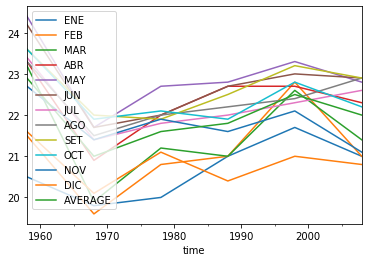

In [114]:
crr.asfreq('10Y').plot()

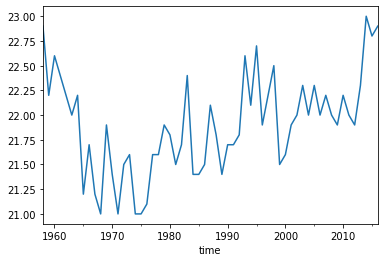

In [131]:
crr.AVERAGE.plot()